Dalam percobaan ini akan dieksplorasi informasi kemungkinan pegawai akan tetap bekerja pada perusahaan dengan kondisi-kondisi yang diinginkan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/My Drive/Big Data Analysis"

ls: cannot access '/content/gdrive/My Drive/Big Data Analysis': No such file or directory


In [110]:
train = pd.read_csv('/content/gdrive/My Drive/Big Data Analysis/employee.csv')  

### Menampilkan 5 data teratas pada dataset

Berikut merupakan tampilan dari lima data teratas pada dataset.

In [111]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### Menampilkan 5 data terbawah pada dataset

Berikut merupakan tampilan dari lima data tebawah pada dataset.

In [112]:
train.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [ ]:
#melihat ukuran dari dataset, berapa banyak data dan atributnya.
train.shape, test.shape

((1470, 35), (1470, 35))

Pada keluaran diatas, dapat diketahui bahwa total baris data yang dimiliki adalah sebanyak 1470 dengan 35 kolom yang merupakan variabel-variabel yang ada pada dataset.

### Statistika Deskriptif

Tabel berikut menunjukkan statistika deskriptif dari masing-masing variabel yang bertipe numerik.

In [ ]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000




*   Dataset berikut berisikan 1470 baris data. Dari tabel diatas, dapat dilihat masing-masing fitur terhitung memiliki 1470 data yang berarti tidak terdapat *missing value*
*   Pada kolom kedua terdapat mean atau rerata dari masing-masing fitur. Pada bagian ini dapat diketahui rata-rata dari usia karyawan, hingga fitur rata-rata waktu (dalam tahun) karyawan bekerja bersama manajer
* Kemudian pada baris selanjutnya adalah hitungan standar deviasi masing-masing fitur
* Baris berikutnya adalah quartil bawah
* Baris berikutnya merupakan quartil tengah atau median
* Baris berikutnya merupakan quartil atas
* Baris berikutnya adalah nilai terbesar pada masing-masing fitur yang ada. Dapat diketahui karyawan tertua berusia 60 tahun, karyawan dengan jarak terjauh dari kantor adalah sejauh 29 kilometer, dan seterusnya. 




### Mengecek Duplikasi pada data

In [113]:
train.duplicated().sum()

0

Pada keluaran diatas diketahui terdapat 0 jumlah baris data yang terduplikasi

## Berikut merupakan informasi tipe variabel.

In [114]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Mencari Fitur Numerik

In [115]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Mencari Fitur Kategorikal

In [ ]:
categorical_features = train.select_dtypes(include = [np.object])
categorical_features.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Menampilkan data-data yang mungkin memiliki missing value

Berikut merupakan tampilan tabular dari proses pemeriksaan missing value yang mungkin ada pada dataset. Nilai False menunjukkan bahwa nilai tidak missing. Sehingga data tersebut memiliki nilai.

In [ ]:
train.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Visualisasi Missing Value dalam 250 sample

Berikut merupakan visualisasi berbentuk batang yang menampilkan kelengkapan data di setiap variabel. Pada grafik dibawah, dilakukan pemeriksaan terhadap 250 data sampel. Terlihat bahwa dari 250 data sampel yang diambil, semua data lengkap dan tidak terdapat missing value sama sekali.

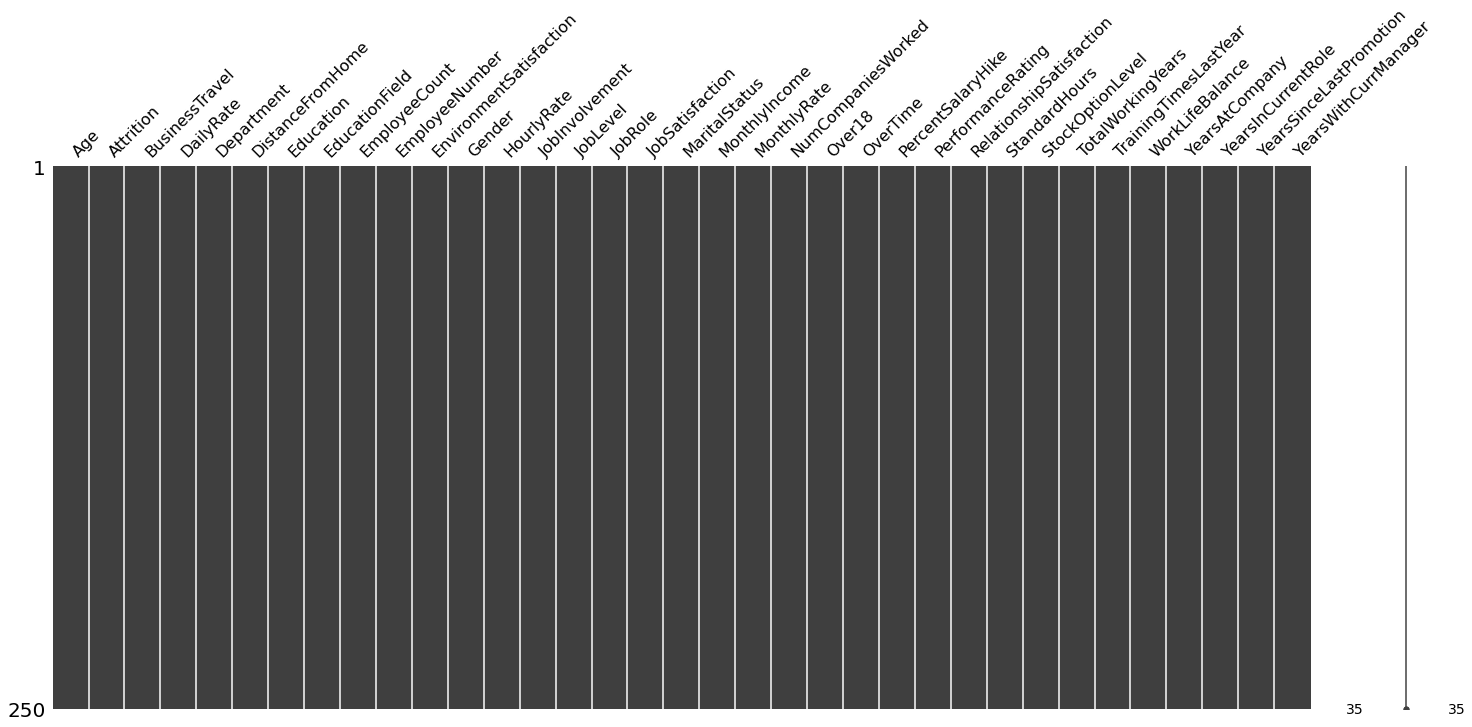

In [ ]:
msno.matrix(train.sample(250))

Kemudian pada grafik berikut diambil lebih banyak data sampel, yaitu sebanyak 1000 data. hasilnya tetap sama, tidak terdapat missing value.

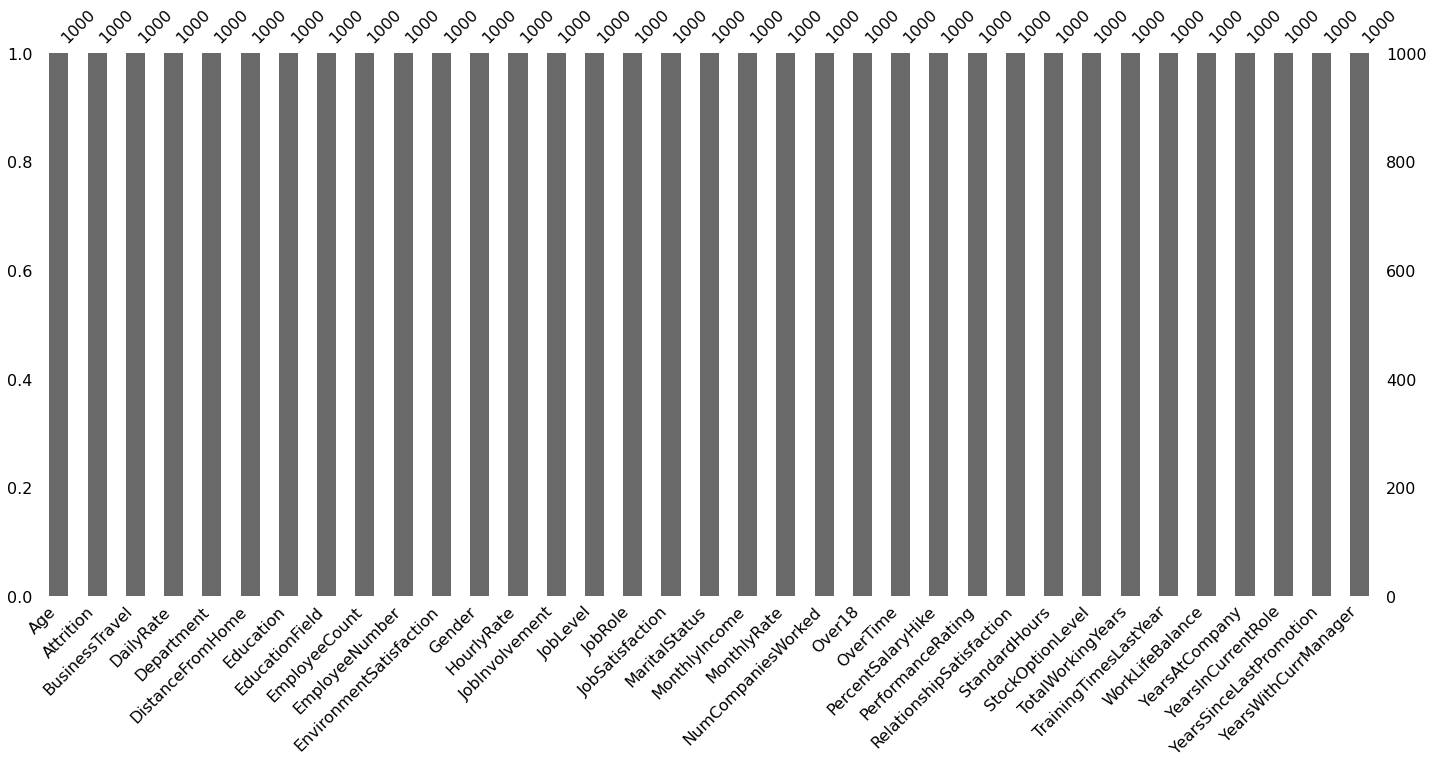

In [ ]:
msno.bar(train.sample(1000))

## Uji Normalitas

Pada bagian ini, diamati normalitas distribusi data. Masing-maing variabel dihitung nilai skew dan curt.

In [ ]:
train.skew(), train.kurt()

(Age                         0.413286
 DailyRate                  -0.003519
 DistanceFromHome            0.958118
 Education                  -0.289681
 EmployeeCount               0.000000
 EmployeeNumber              0.016574
 EnvironmentSatisfaction    -0.321654
 HourlyRate                 -0.032311
 JobInvolvement             -0.498419
 JobLevel                    1.025401
 JobSatisfaction            -0.329672
 MonthlyIncome               1.369817
 MonthlyRate                 0.018578
 NumCompaniesWorked          1.026471
 PercentSalaryHike           0.821128
 PerformanceRating           1.921883
 RelationshipSatisfaction   -0.302828
 StandardHours               0.000000
 StockOptionLevel            0.968980
 TotalWorkingYears           1.117172
 TrainingTimesLastYear       0.553124
 WorkLifeBalance            -0.552480
 YearsAtCompany              1.764529
 YearsInCurrentRole          0.917363
 YearsSinceLastPromotion     1.984290
 YearsWithCurrManager        0.833451
 dtype: floa

Dilakukan visualisasi terhadap distribusi data untuk fitur Attrition. Dari tampilan grafik berikut, Nampak bahwa distribusi data mendekati normal. Sehingga masih perlu dilakukan transformasi sebelum dilakukan pemodelan.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Attrition
Attrition,
No,1233
Yes,237


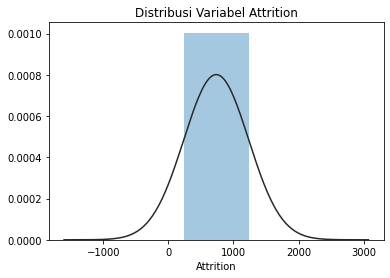

In [120]:
y = train['Attrition'].value_counts()
# plt.figure(1); plt.title('Johnson SU')
# sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(1); plt.title('Distribusi Variabel Attrition')
sns.distplot(y, kde=False, fit=st.norm)
pd.DataFrame(train.groupby(['Attrition'])['Attrition'].size())
# plt.figure(3); plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=st.lognorm)

Skewness adalah ukuran ketidaksimetrisan dalam distribusi nilai. Skewness dapat bernilai positif, negatif, dan nol. Pada grafik berikut menunjukkan positive skew karena condong ke sebelah kiri. Hal ini berarti ebagian besar distribusi berada di nilai rendah.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


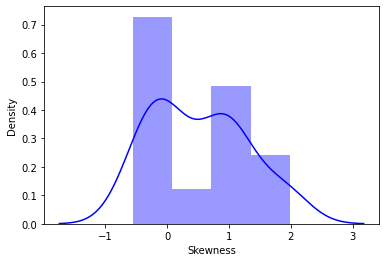

In [ ]:
sns.distplot(train.skew(),color='blue',axlabel ='Skewness')

Kurtosis adalah indikator untuk menunjukkan derajat keruncingan (tailedness). Semakin besar nilai kurtosis maka kurva semakin runcing. Nilai referensi kurtosis adalah 3. Pada grafik berikut, nilai kurtosis menunjukkan kurang dari 3, maka disebut platikurtik. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


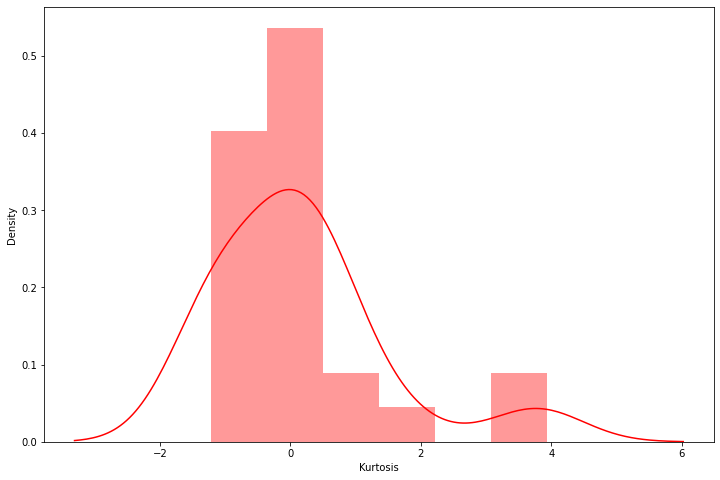

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(train.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
plt.show()

Berikut merupakan grafik sebaran dari nilai-nilai yang ada pada variabel Total Working Years, yang menunjukkan lamanya seorang pegawai (dalam hitungan tahun) bekerja di perusahaan tersebut. Nilai tertinggi ada pada nilai 10 dan 5 tahun. Selanjutnya, akan coba diteliti variabel-variabel apa saja yang berkorelasi dengan Total Working Years. 

## Fitur Age









In [124]:
pd.DataFrame(train.Age.describe())

,Age
count,1470.000000
mean,36.923810
std,9.135373
min,18.000000
25%,30.000000
50%,36.000000
75%,43.000000
max,60.000000


Memanggil kembali data statistika deskriptif fitur Age atau usia

Text(0.5, 1.0, 'Box plot dari Usia Karyawan yanng Terdapat pada Perusahaan')

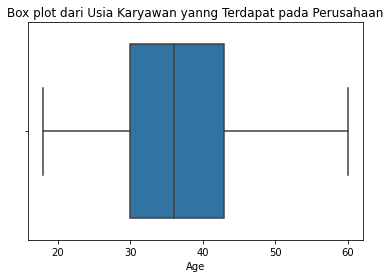

In [127]:
sns.boxplot(x=train['Age'])
plt.title('Box plot dari Usia Karyawan yanng Terdapat pada Perusahaan')


*   Karena rata-rata hampir sama dengan median, maka sebaran usia karyawan mendekati normal dengan rata-rata usia 36 tahun.
*   Dari Visualisasi diatas tidak nampak adanya pencilan data


Text(0.5, 1.0, 'Distribusi Usia Karyawan')

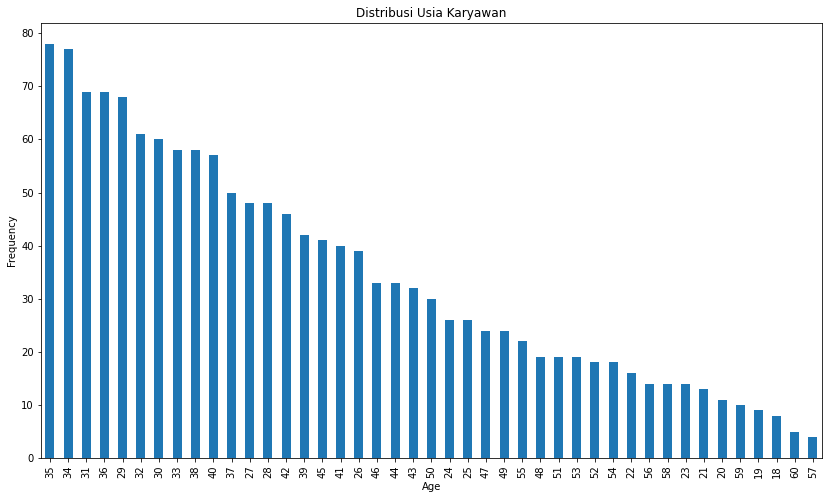

In [52]:
ax = train['Age'].value_counts().plot(kind='bar', figsize=(14,8))
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribusi Usia Karyawan")

* Grafik diatas dapat diperoleh informasi bahwa mayoritas karyawan adalah usia menengah, yakni usia 30an hingga 40an awal
* Karyawan dengan usia 35 tahun berjumlah paling banyak diantara usia-usia lain
* Karyawan dengan usia paling tua, yakni 60 tahun berada pada jajaran jumlah nomor dua paling sedikit setelah usia 57 tahun

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


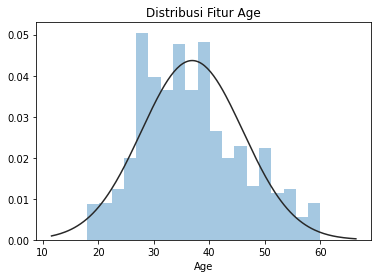

In [128]:
plt.figure(1); plt.title('Distribusi Fitur Age')
sns.distplot(train['Age'], kde=False, fit=st.norm)

Usia karyawan berkisar antara 18 dan 60, yang tampaknya secara intuitif benar karena sebagian besar usia kerja tidak dibatasi mulai dari 18 hingga 60. 

Text(0.5, 1.0, 'Distribusi Usia Karyawan yang ter-Atrisi')

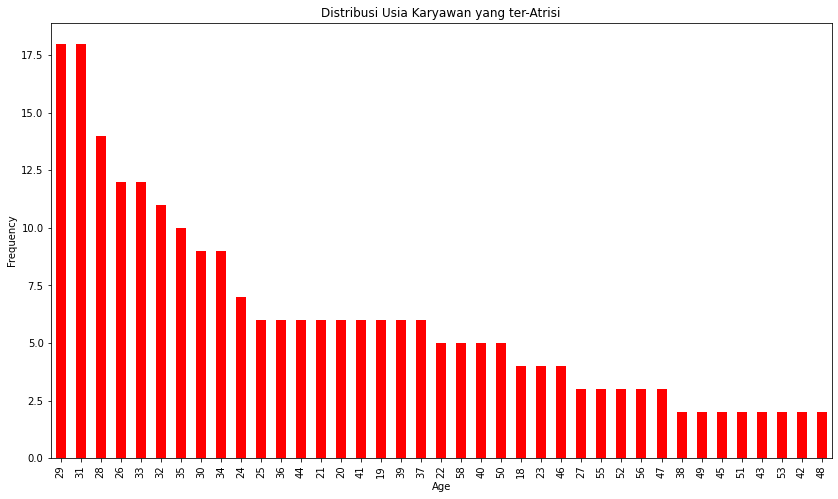

In [72]:
ax = train.loc[(train['Attrition']=='Yes'), 'Age'].value_counts().plot(kind='bar', figsize=(14,8), color='red')
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_title("Distribusi Usia Karyawan yang ter-Atrisi")

* Proporsi karyawan yang keluar relatif berasal dari usia menengah, sedangkan karyawan tingkat senior dan karyawan dengan usia yang lebih muda cenderung lebih sedikit. Mungkin karyawan ini memiliki otoritas yang lebih tinggi dan kecil kemungkinannya untuk meninggalkan posisi itu. Sedangkan karyawan muda mungkin dipengaruhi oleh waktu bekerja yang masih baru, sehingga tingkat atrisi masih rendah

## Gender

In [44]:
pd.DataFrame(train.groupby(['Gender', 'Attrition'])['Gender'].size())

Gender
Gender Attrition        
Female No            501
       Yes            87
Male   No            732
       Yes           150

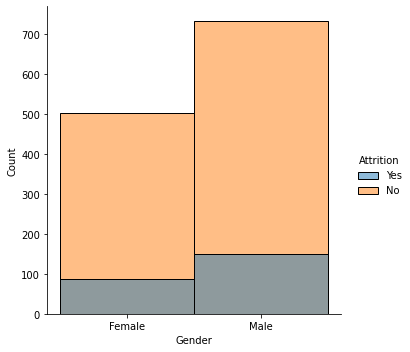

In [77]:
sns.displot(train, x="Gender", hue='Attrition', )

Laki-laki cenderung memiliki tingkat atrisi yang lebih tinggi daripada perempuan.

## Departemen

In [45]:
pd.DataFrame(train.groupby(['Department', 'Attrition'])['Department'].size())

Department
Department             Attrition            
Human Resources        No                 51
                       Yes                12
Research & Development No                828
                       Yes               133
Sales                  No                354
                       Yes                92

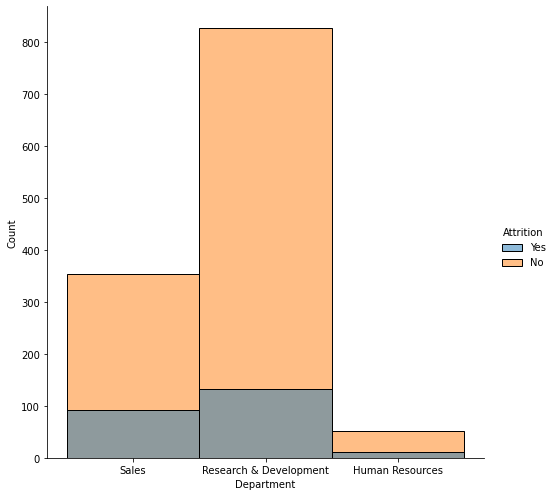

In [121]:
sns.displot(train, x="Department", hue='Attrition', height=7)

Departemen Riset dan Pengembangan cenderung memiliki tingkat atrisi yang lebih tinggi daripada departemen lainnya.

## Edukasi

In [87]:
pd.DataFrame(train.groupby(['Education', 'Attrition'])['Education'].size())

Education
Education Attrition           
1         No               139
          Yes               31
2         No               238
          Yes               44
3         No               473
          Yes               99
4         No               340
          Yes               58
5         No                43
          Yes                5

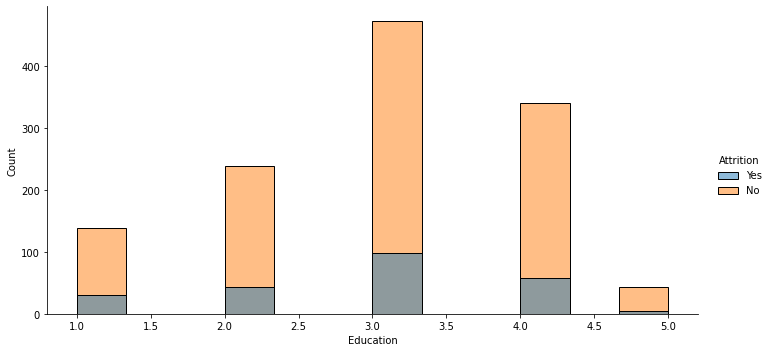

In [9]:
sns.displot(train, x="Education", hue='Attrition', aspect=2)

* Edukasi (1 = dibawah kuliah, 2 = kuliah, 3 = Sarjana, 4 = Master, 5 = Doktor
*Gelar Sarjana cenderung memiliki tingkat atrisi yang lebih tinggi daripada yang lainnya, diikuti dengan gelar Master.

In [65]:
pd.DataFrame(train.groupby(['Education', 'Attrition'])['Department'].size())

EducationField
EducationField   Attrition                
Human Resources  No                     20
                 Yes                     7
Life Sciences    No                    517
                 Yes                    89
Marketing        No                    124
                 Yes                    35
Medical          No                    401
                 Yes                    63
Other            No                     71
                 Yes                    11
Technical Degree No                    100
                 Yes                    32

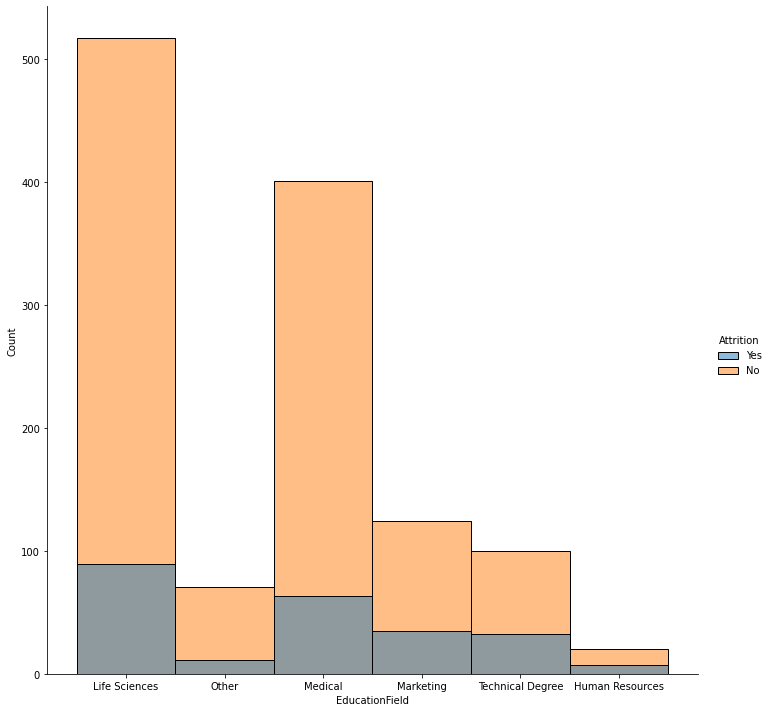

In [122]:
sns.displot(train, x="EducationField", hue='Attrition',height=10)

Bidang Ilmu Kehidupan cenderung memiliki tingkat atrisi yang lebih tinggi daripada bidang lainnya, diikuti dengan bidang medikal.

##Satisfaction

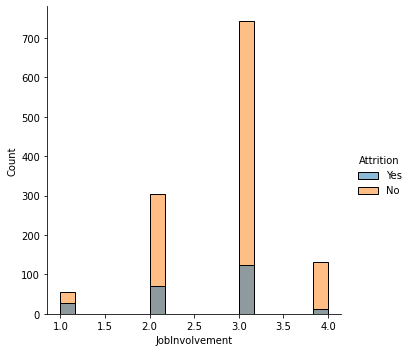

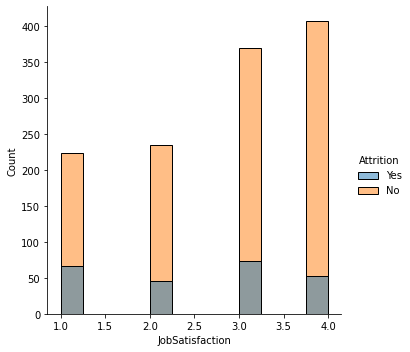

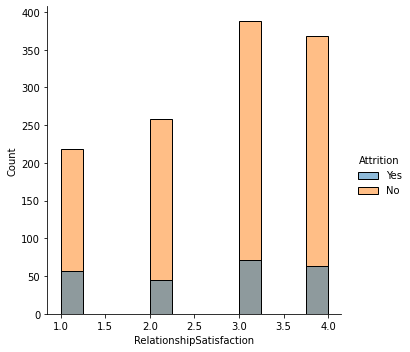

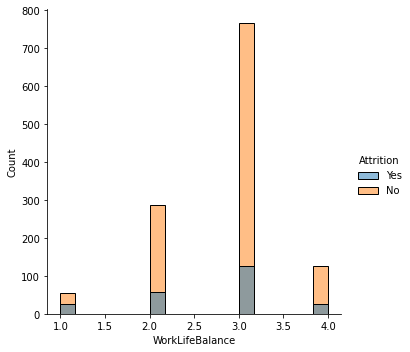

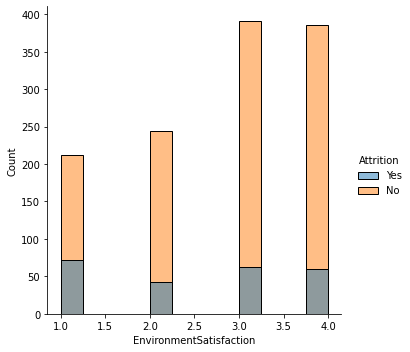

In [35]:
cols=["JobInvolvement", "JobSatisfaction", "RelationshipSatisfaction","WorkLifeBalance","EnvironmentSatisfaction"]
for i, col in enumerate(cols):
    sns.displot(train, x=cols[i], hue='Attrition')

* Karyawan dengan keterlibatan kerja tinggi justru lebih banyak melakukan atrisi dibandingkan dengan keterlibatan kerja yang rendah, dan tinggi. Namun hanya sedikit lebih tinggi dari karyawan dengan keterllibatan kerja sedang
*  Karyawan dengan kepuasan kerja tinggi terlihat paling banyak melakukan atrisi. Sedikit lebih tinggi dari Karyawan dengan kepuasan kerja yang rendah.
* Karyawan dengan tingkat kepuasan hubungan yang baik justru memiliki jumlah atrisi yang paling tinggi. sedikit lebih tinggi daripada tiingkat kepuasan hubungan yang paling rendah
* Karyawan dengan *work life balance* tinggi terlihat paling banyak melakukan atrisi dibandingkan dengan yang rendah, sedang, dan sangat tinggi
* Karyawan dengan kepuasan lingkungan terendah cenderung melakukan atrisi daripada yang lain

##Distance from Home

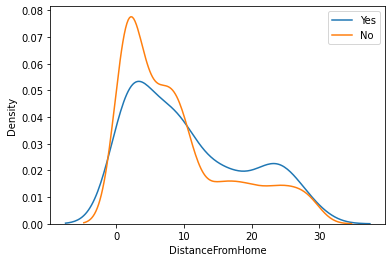

In [40]:
Attrition_Y = train [train ['Attrition'] == 'Yes'] 
Attrition_N = train [train ['Attrition'] == 'No'] 
sns.kdeplot (Attrition_Y.DistanceFromHome) 
sns.kdeplot (Attrition_N.DistanceFromHome) 
plt.legend (('Yes' ,'No'))

* Sebagian besar karyawan tinggal lebih dekat dengan lokasi kantor.
* Terdapat proporsi karyawan yang berhenti bekerja jauh dari kantor (Lebih dari 10 KM) lebih tinggi dibandingkan dengan proporsi karyawan yang tidak meninggalkan perusahaan dan tinggal jauh dari kantor.

## **Uji Korelasi**

Berikut merupakan nilai-nilai korelasi masing-masing variabel terhadap variabel TotalWorkingYears. Masing-masing nilai diurutkan dari terbesar ke terkecil.

In [106]:
obj_dict ={
    'Yes': 1,
    'No': 0
}

In [107]:
train['Attrition']= train['Attrition'].replace(obj_dict)

In [94]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [98]:
numeric_features = train.select_dtypes(include = [np.number])
numeric_features.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [99]:
correlation = numeric_features.corr()
print(correlation['Attrition'].sort_values(ascending = False),'\n')

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

Gambar berikut menunjukkan korelasi antar variabel. Tingkat korelasi disimbolkan dengan warna, dimana semakin terang warnanya, maka semakin tinggi nilai korelasinya. Sebaliknya, semakin gelap warnanya, maka semakin kecil korelasinya. Sebagai contoh, TotalWorkingYears tampak berkorelasi tinggi dengan variabel JobLevel dan MonthlyIncome, namun ternyata juga justru berkorelasi rendah dengan variabel HourlyRate. Dengan tampilan seperti ini, dapat diketahui factor-faktor apa saja yang mempengaruhi suatu variabel.

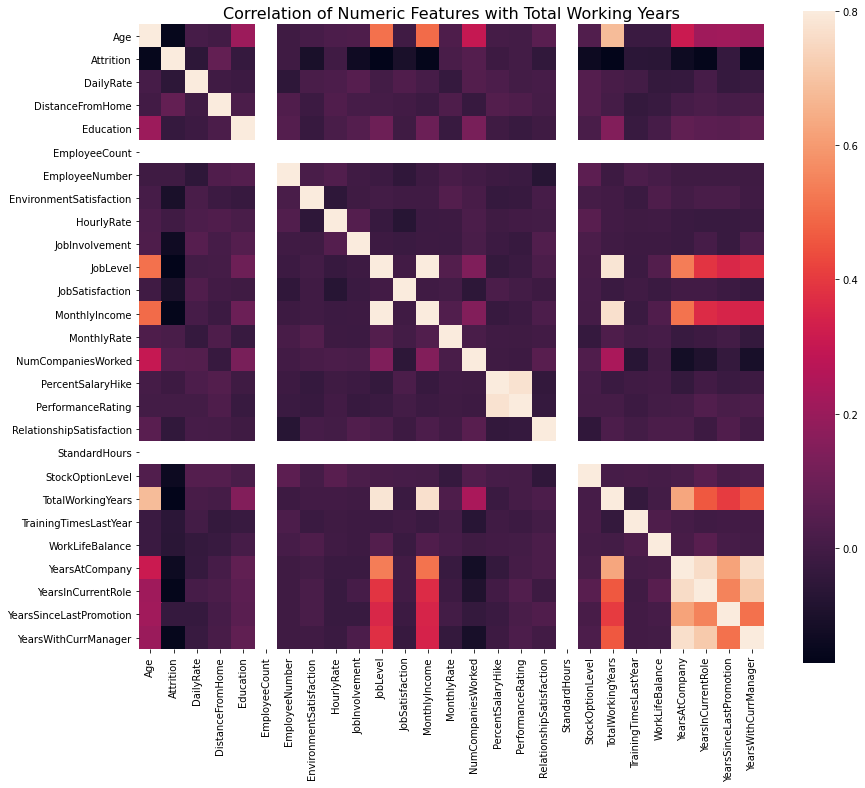

In [100]:
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation of Numeric Features with Total Working Years',y=1,size=16)

sns.heatmap(correlation,square = True,  vmax=0.8)

Ketika gambaran diatas terlihat sangat rumit karena melibatkan seluruh variabel, maka pada matriks berikut ini akan dipilih hanya 11 variabel yang memiliki korelasi tertinggi diantara yang lainnya. Matriks ini akan terlihat lebih jelas, karena juga diikuti dengan nilai korelasinya. Semakin kuning warnanya, maka semakin tinggi niai korelasinya. 

Index(['TotalWorkingYears', 'JobLevel', 'MonthlyIncome', 'Age',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
       'YearsSinceLastPromotion', 'NumCompaniesWorked', 'Education',
       'MonthlyRate'],
      dtype='object')


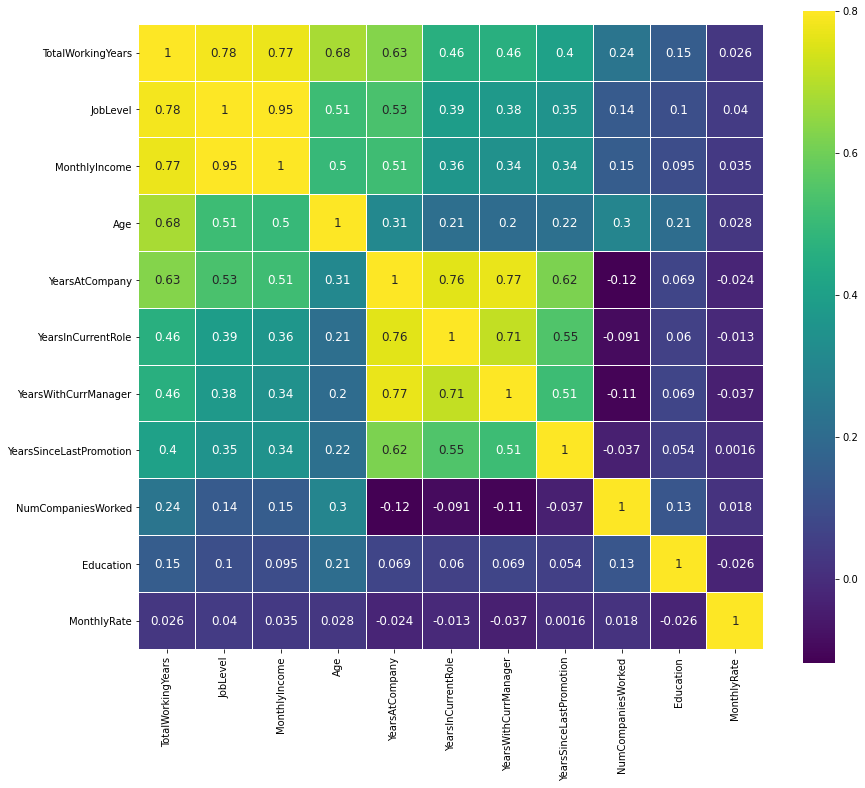

In [102]:
k= 11
cols = correlation.nlargest(k,'TotalWorkingYears')['TotalWorkingYears'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

* Dari matriks diatas, semakin cerah atau semakin kuning warnanya, maka semakin besar korelasinya, diikuti juga dengan nilai korelasi yang tertera. Semakin cerah warnanya, maka semakin tinggi nilai korelasi antar variabel
* Dari matriks di atas maka didapatkan informasi-informasi seperti contohnya pendapatan per bulan (MonthlyIncome) korelasinya sangat tinggi dengan level pekerjaan (JobLevel)

Pada grafik dibawah ini, ditampilkan korelasi beberapa variabel terpilih terhadap variabel TotalWorkingYears. Terlihat dari semua grafik tersebut variabel-variabel seperti Age (umur), Job Level (level pekerjaan), MonthlyIncome (pendapatan perbulan), YearsAtCompany (Tahun bekerja di perusahaan), YearsWithCurrManager (lamanya bekerja dengan manajer), YearsSinceLastPromotion(hitungan waktu dalam tahun sejak mendapatkan promosi terakhir) berkorelasi positif terhadap variabel TotalWorkingYears.

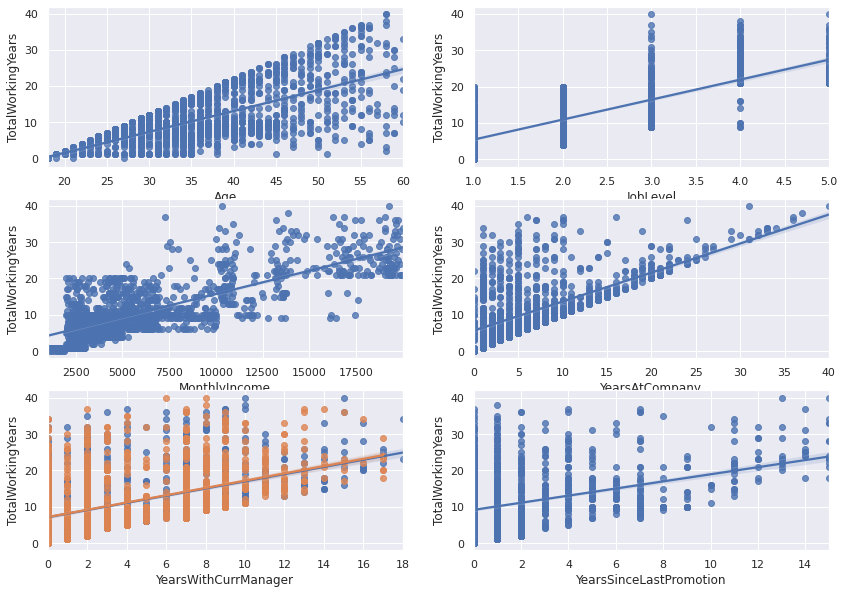

In [ ]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
Age_scatter_plot = pd.concat([train['TotalWorkingYears'],train['Age']],axis = 1)
sns.regplot(x='Age',y = 'TotalWorkingYears',data = Age_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
JobLevel_scatter_plot = pd.concat([train['TotalWorkingYears'],train['JobLevel']],axis = 1)
sns.regplot(x='JobLevel',y = 'TotalWorkingYears',data = JobLevel_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
MonthlyIncome_scatter_plot = pd.concat([train['TotalWorkingYears'],train['MonthlyIncome']],axis = 1)
sns.regplot(x='MonthlyIncome',y = 'TotalWorkingYears',data = MonthlyIncome_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
YearsAtCompany_scatter_plot = pd.concat([train['TotalWorkingYears'],train['YearsAtCompany']],axis = 1)
sns.regplot(x='YearsAtCompany',y = 'TotalWorkingYears',data = YearsAtCompany_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
YearsInCurrentRole_scatter_plot = pd.concat([train['TotalWorkingYears'],train['YearsInCurrentRole']],axis = 1)
sns.regplot(x='YearsInCurrentRole',y = 'TotalWorkingYears',data = YearsInCurrentRole_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearsWithCurrManager_scatter_plot = pd.concat([train['TotalWorkingYears'],train['YearsWithCurrManager']],axis = 1)
sns.regplot(x='YearsWithCurrManager',y = 'TotalWorkingYears',data =YearsWithCurrManager_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearsSinceLastPromotion_scatter_plot = pd.concat([train['TotalWorkingYears'],train['YearsSinceLastPromotion']],axis = 1)
sns.regplot(x='YearsSinceLastPromotion',y = 'TotalWorkingYears',data = YearsSinceLastPromotion_scatter_plot,scatter= True, fit_reg=True, ax=ax6)